# **K-Nearest Neighbors Approach to Laptop Type Classification**

# **Import Library**

In [1]:
import pandas as pd # data manipulation and analysis
import seaborn as sns # statistics data visualization
import matplotlib.pyplot as plt # create graphs in Python
import plotly.express as px # create interactive data visualizations
from sklearn.model_selection import train_test_split # To divide the dataset into training data and test data
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors algorithm for classification
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # metrics to measure model performance
from sklearn.preprocessing import LabelEncoder # To convert categorical labels to integers
from sklearn.model_selection import GridSearchCV # To find the best parameters through grid search.

# **Data Understanding**

Read Dataset

In [2]:
# Load the dataset from the CSV file
df = pd.read_csv('laptop_data_cleaned.csv')
jumlah_data = len(df)
print(f"Amount of data in the dataset: {jumlah_data}")
df

Amount of data in the dataset: 1273


,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [3]:
def plot_hist(variable):
    plt.figure(figsize=(7,3))
    plt.hist(df[variable], bins = 30)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"Graphic of {variable}")
    plt.show()

def plot_hist(variable):
    fig = px.histogram(df, x=variable, title=f"Histogram of {variable}", labels={variable: variable}, nbins=30)
    fig.update_layout(xaxis_title=variable, yaxis_title="Frequency")
    fig.show()

numeric = ["Company","TypeName", "Ram", "Weight", "Price", "TouchScreen", "Ips", "Ppi", "Cpu_brand", "HDD", "SSD", "Gpu_brand", "Os"]
for i in numeric:
    plot_hist(i)

### **Visualization of the Relationship Between Features and TypeName**

In [4]:
# Gunakan df[::5] untuk setiap lima baris
fig = px.scatter(df[::5], x="Company", y="TypeName", title="Bar Plot of Company vs TypeName",
             labels={"TypeName": "Frequency", "Company": "Company"},
             hover_data={"Company": True, "TypeName": True})

# Menambahkan informasi hover
fig.update_traces(hovertemplate="Company: %{x}<br>TypeName: %{y}")

# Menyesuaikan tampilan
fig.update_layout(xaxis_title="Company", yaxis_title="Frequency", xaxis=dict(tickangle=0))

# Menampilkan plot interaktif
fig.show()

In [5]:
# Gunakan df[::5] untuk setiap lima baris
fig = px.scatter(df[::5], x="Ram", y="TypeName", title="Bar Plot of Ram vs TypeName",
             labels={"TypeName": "Frequency", "Ram": "Ram"},
             hover_data={"Ram": True, "TypeName": True})

# Menambahkan informasi hover
fig.update_traces(hovertemplate="Ram: %{x}<br>TypeName: %{y}")

# Menyesuaikan tampilan
fig.update_layout(xaxis_title="Ram", yaxis_title="Frequency", xaxis=dict(tickangle=0))

# Menampilkan plot interaktif
fig.show()


In [6]:
# Gunakan df[::5] untuk setiap seratus baris
fig = px.scatter(df[::5], x="Weight", y="TypeName", title="Bar Plot of Weight vs TypeName",
             labels={"TypeName": "Frequency", "Weight": "Weight"},
             hover_data={"Weight": True, "TypeName": True})

# Menambahkan informasi hover
fig.update_traces(hovertemplate="Weight: %{x}<br>TypeName: %{y}")

# Menyesuaikan tampilan
fig.update_layout(xaxis_title="Weight", yaxis_title="Frequency", xaxis=dict(tickangle=0))

# Menampilkan plot interaktif
fig.show()


In [7]:
# Gunakan df[::5] untuk setiap seratus baris
fig = px.scatter(df[::5], x="Price", y="TypeName", title="Bar Plot of Price vs TypeName",
             labels={"TypeName": "Frequency", "Price": "Price"},
             hover_data={"Price": True, "TypeName": True})

# Menambahkan informasi hover
fig.update_traces(hovertemplate="Price: %{x}<br>TypeName: %{y}")

# Menyesuaikan tampilan
fig.update_layout(xaxis_title="Price", yaxis_title="Frequency", xaxis=dict(tickangle=0))

# Menampilkan plot interaktif
fig.show()

In [8]:
# Gunakan df[::5] untuk setiap seratus baris
fig = px.scatter(df[::5], x="TouchScreen", y="TypeName", title="Bar Plot of TouchScreen vs TypeName",
             labels={"TypeName": "Frequency", "TouchScreen": "TouchScreen"},
             hover_data={"TouchScreen": True, "TypeName": True})

# Menambahkan informasi hover
fig.update_traces(hovertemplate="TouchScreen: %{x}<br>TypeName: %{y}")

# Menyesuaikan tampilan
fig.update_layout(xaxis_title="TouchScreen", yaxis_title="Frequency", xaxis=dict(tickangle=0))

# Menampilkan plot interaktif
fig.show()

In [9]:
# Gunakan df[::5] untuk setiap seratus baris
fig = px.scatter(df[::5], x="Ips", y="TypeName", title="Bar Plot of Ips vs TypeName",
             labels={"TypeName": "Frequency", "Ips": "Ips"},
             hover_data={"Ips": True, "TypeName": True})

# Menambahkan informasi hover
fig.update_traces(hovertemplate="Ips: %{x}<br>TypeName: %{y}")

# Menyesuaikan tampilan
fig.update_layout(xaxis_title="Ips", yaxis_title="Frequency", xaxis=dict(tickangle=0))

# Menampilkan plot interaktif
fig.show()

In [10]:
# Gunakan df[::5] untuk setiap seratus baris
fig = px.scatter(df[::5], x="Ppi", y="TypeName", title="Bar Plot of Ppi vs TypeName",
             labels={"TypeName": "Frequency", "Ppi": "Ppi"},
             hover_data={"Ppi": True, "TypeName": True})

# Menambahkan informasi hover
fig.update_traces(hovertemplate="Ppi: %{x}<br>TypeName: %{y}")

# Menyesuaikan tampilan
fig.update_layout(xaxis_title="Ppi", yaxis_title="Frequency", xaxis=dict(tickangle=0))

# Menampilkan plot interaktif
fig.show()

In [11]:
# Gunakan df[::5] untuk setiap seratus baris
fig = px.scatter(df[::5], x="Cpu_brand", y="TypeName", title="Bar Plot of Cpu_brand vs TypeName",
             labels={"TypeName": "Frequency", "Cpu_brand": "Cpu_brand"},
             hover_data={"Cpu_brand": True, "TypeName": True})

# Menambahkan informasi hover
fig.update_traces(hovertemplate="Cpu_brand: %{x}<br>TypeName: %{y}")

# Menyesuaikan tampilan
fig.update_layout(xaxis_title="Cpu_brand", yaxis_title="Frequency", xaxis=dict(tickangle=0))

# Menampilkan plot interaktif
fig.show()

In [12]:
# Gunakan df[::5] untuk setiap seratus baris
fig = px.scatter(df[::5], x="HDD", y="TypeName", title="Bar Plot of HDD vs TypeName",
             labels={"TypeName": "Frequency", "HDD": "HDD"},
             hover_data={"HDD": True, "TypeName": True})

# Menambahkan informasi hover
fig.update_traces(hovertemplate="HDD: %{x}<br>TypeName: %{y}")

# Menyesuaikan tampilan
fig.update_layout(xaxis_title="HDD", yaxis_title="Frequency", xaxis=dict(tickangle=0))

# Menampilkan plot interaktif
fig.show()

In [13]:
# Gunakan df[::5] untuk setiap seratus baris
fig = px.scatter(df[::5], x="SSD", y="TypeName", title="Bar Plot of SSD vs TypeName",
             labels={"TypeName": "Frequency", "SSD": "SSD"},
             hover_data={"SSD": True, "TypeName": True})

# Menambahkan informasi hover
fig.update_traces(hovertemplate="SSD: %{x}<br>TypeName: %{y}")

# Menyesuaikan tampilan
fig.update_layout(xaxis_title="SSD", yaxis_title="Frequency", xaxis=dict(tickangle=0))

# Menampilkan plot interaktif
fig.show()

In [14]:
# Gunakan df[::5] untuk setiap seratus baris
fig = px.scatter(df[::5], x="Gpu_brand", y="TypeName", title="Bar Plot of Gpu_brand vs TypeName",
             labels={"TypeName": "Frequency", "Gpu_brand": "Gpu_brand"},
             hover_data={"Gpu_brand": True, "TypeName": True})

# Menambahkan informasi hover
fig.update_traces(hovertemplate="Gpu_brand: %{x}<br>TypeName: %{y}")

# Menyesuaikan tampilan
fig.update_layout(xaxis_title="Gpu_brand", yaxis_title="Frequency", xaxis=dict(tickangle=0))

# Menampilkan plot interaktif
fig.show()

In [15]:
# Gunakan df[::5] untuk setiap seratus baris
fig = px.scatter(df[::5], x="Os", y="TypeName", title="Bar Plot of Os vs TypeName",
             labels={"TypeName": "Frequency", "Os": "Os"},
             hover_data={"Os": True, "TypeName": True})

# Menambahkan informasi hover
fig.update_traces(hovertemplate="Os: %{x}<br>TypeName: %{y}")

# Menyesuaikan tampilan
fig.update_layout(xaxis_title="Os", yaxis_title="Frequency", xaxis=dict(tickangle=0))

# Menampilkan plot interaktif
fig.show()

# **Cleaning Data**

Create Encoding Labels for Categorical Column

In [16]:
# Create a new column for the encoded
col_encoder = LabelEncoder()
df['Company_label'] = col_encoder.fit_transform(df['Company']) #change into numerik data
df['Cpu'] = col_encoder.fit_transform(df['Cpu_brand']) #change into numerik data
df['Gpu'] = col_encoder.fit_transform(df['Gpu_brand']) #change into numerik data
df['TypeName_label'] = col_encoder.fit_transform(df['TypeName']) #change into numerik data
df['Os_label'] = col_encoder.fit_transform(df['Os']) #change into numerik data

# **Display Encode Result**

In [17]:
# Display the encoded label results sorted numerically
sorted_company_labels = sorted(zip(df['Company'], df['Company_label']), key=lambda x: x[1])
print("Company_label encoding:")
print(dict(sorted_company_labels))

sorted_cpu_labels = sorted(zip(df['Cpu_brand'], df['Cpu']), key=lambda x: x[1])
print("\nCpu encoding:")
print(dict(sorted_cpu_labels))

sorted_gpu_labels = sorted(zip(df['Gpu_brand'], df['Gpu']), key=lambda x: x[1])
print("\nGpu encoding:")
print(dict(sorted_gpu_labels))

sorted_type_labels = sorted(zip(df['TypeName'], df['TypeName_label']), key=lambda x: x[1])
print("\nTypeName_label encoding:")
print(dict(sorted_type_labels))

sorted_os_labels = sorted(zip(df['Os'], df['Os_label']), key=lambda x: x[1])
print("\nOs_label encoding:")
print(dict(sorted_os_labels))

Company_label encoding:
{'Acer': 0, 'Apple': 1, 'Asus': 2, 'Chuwi': 3, 'Dell': 4, 'Fujitsu': 5, 'Google': 6, 'HP': 7, 'Huawei': 8, 'LG': 9, 'Lenovo': 10, 'MSI': 11, 'Mediacom': 12, 'Microsoft': 13, 'Razer': 14, 'Samsung': 15, 'Toshiba': 16, 'Vero': 17, 'Xiaomi': 18}

Cpu encoding:
{'AMD Processor': 0, 'Intel Core i3': 1, 'Intel Core i5': 2, 'Intel Core i7': 3, 'Other Intel Processor': 4}

Gpu encoding:
{'AMD': 0, 'Intel': 1, 'Nvidia': 2}

TypeName_label encoding:
{'2 in 1 Convertible': 0, 'Gaming': 1, 'Netbook': 2, 'Notebook': 3, 'Ultrabook': 4, 'Workstation': 5}

Os_label encoding:
{'Mac': 0, 'Others': 1, 'Windows': 2}


In [18]:
print(df)

     Company            TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0      Apple           Ultrabook    8    1.37  11.175755            0    1   
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271  Lenovo            Notebook    2    1.50   9.409283            0    0   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi              Cpu_brand   HDD  SSD Gpu_brand   

In [19]:
# Check the relationship between the laptop type label and other variables in the DataFrame.
print(df.columns)
list_value = ["Company_label", "TypeName_label", "Ram", "Weight", "Price", "TouchScreen", "Ips", "Ppi", "Cpu", "HDD", "SSD", "Gpu", "Os_label"]

corr_matrix = df[list_value].corr()
print(corr_matrix["TypeName_label"].sort_values(ascending=False))

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os', 'Company_label',
       'Cpu', 'Gpu', 'TypeName_label', 'Os_label'],
      dtype='object')
TypeName_label    1.000000
Company_label     0.005373
Ppi              -0.028490
SSD              -0.073101
Os_label         -0.110535
Cpu              -0.121850
Price            -0.125212
Ips              -0.154569
HDD              -0.199795
Ram              -0.244020
Gpu              -0.252458
Weight           -0.278346
TouchScreen      -0.404706
Name: TypeName_label, dtype: float64


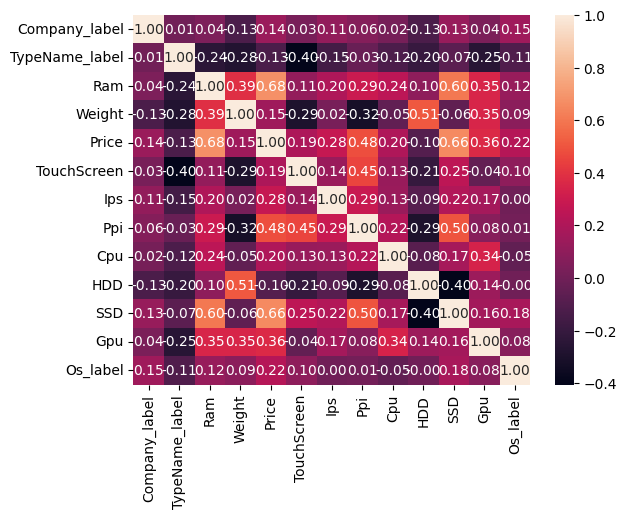

In [20]:
sns.heatmap(df[list_value].corr(), annot=True, fmt=".2f")
plt.show()

# **Hyperparameter Tuning**

*   Model Performance Settings
*   Prevention of Overfitting or Undetfitting
*   Performance Optimization
*   Appropriate Model Selection


In [21]:
# Select relevant features and target variable
features = ['Ram', 'HDD', 'SSD', 'Company_label', 'Cpu', 'Os_label']
target = 'TypeName'

# Extract features and target variable
x = df[features]
y = df[target]

In [22]:
# Perform GridSearchCV for hyperparameter tuning (Find the best param)

param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [23]:
# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

{'n_neighbors': 11, 'weights': 'uniform'}

# **Split The Data for Train and Test**

In [24]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
# Create a new KNN model with the best parameters and train it
knn_model = KNeighborsClassifier(**best_params)

In [26]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

# **Check Data Accuracy**

In [27]:
# Make predictions on the test set
y_pred = knn_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the Test Set: {accuracy:.2%}')

# Print the classification report and confusion matrix for the test set
print('\nClassification Report for Test Set:\n')
print(classification_report(y_test, y_pred))

Accuracy on the Test Set: 68.24%

Classification Report for Test Set:

                    precision    recall  f1-score   support

2 in 1 Convertible       0.31      0.30      0.30        27
            Gaming       0.81      0.67      0.73        39
           Netbook       0.00      0.00      0.00         4
          Notebook       0.75      0.85      0.79       149
         Ultrabook       0.50      0.42      0.46        33
       Workstation       0.00      0.00      0.00         3

          accuracy                           0.68       255
         macro avg       0.40      0.37      0.38       255
      weighted avg       0.66      0.68      0.67       255



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Confusion Matrix for Test Set:

[[  8   1   0  16   2   0]
 [  3  26   0   8   2   0]
 [  0   0   0   4   0   0]
 [  8   5   1 126   9   0]
 [  6   0   0  13  14   0]
 [  1   0   0   1   1   0]]


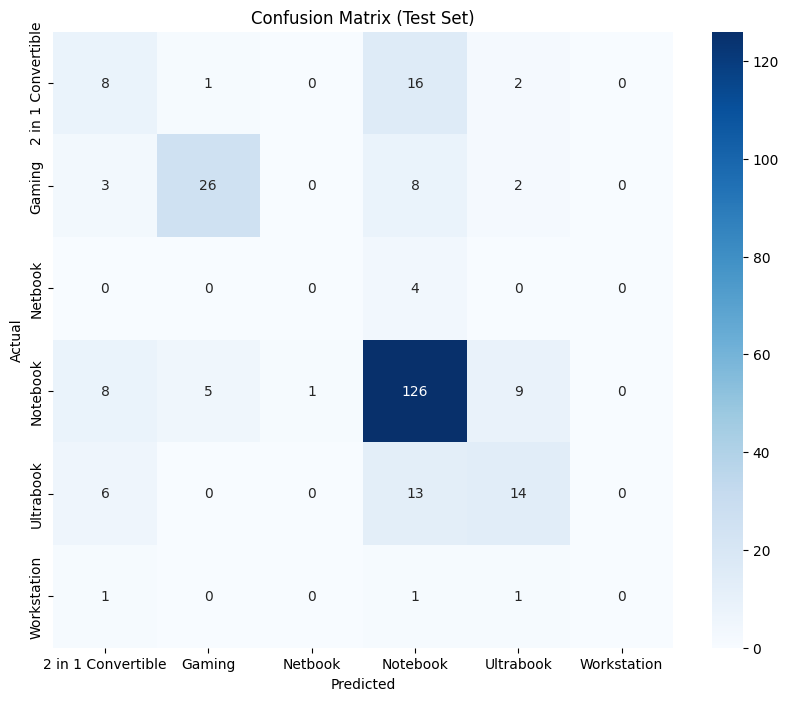

In [28]:
labels = ['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation']
# Display heatmap for the average confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Test Set:\n')
print(conf_matrix)

# Display heatmap for the confusion matrix with actual and predicted values
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# **Create a Model**

In [29]:
import joblib

# Save the model to a file
joblib.dump(knn_model, 'knn_model.joblib')

['knn_model.joblib']

# **Final Result**

In [30]:
# Load the saved model
loaded_model = joblib.load('knn_model.joblib')

# Get user input
user_input = [
    float(input('Enter RAM size in GB: ')),
    float(input('Enter HDD size in GB: ')),
    float(input('Enter SSD size in GB: ')),
    input('Enter CPU brand: '),
    input('Enter Company Name: '),
    input('Enter Os type: ')
]

# Cari nilai numerik untuk merepresentasikan merek CPU dari input pengguna
cpu_label = df.loc[df['Cpu_brand'] == user_input[3], 'Cpu'].values[0]
user_input[3] = cpu_label

# Cari nilai numerik untuk merepresentasikan perusahaan (Company) dari input pengguna
company_label = df.loc[df['Company'] == user_input[4], 'Company_label'].values[0]
user_input[4] = company_label

# Cari nilai numerik untuk merepresentasikan sistem operasi (Os) dari input pengguna
os_label = df.loc[df['Os'] == user_input[5], 'Os_label'].values[0]
user_input[5] = os_label

# Make a prediction using the loaded model
user_input = [user_input]  # Convert to a 2D array
predicted_label = loaded_model.predict(user_input)
print(predicted_label)

print(f'The predicted laptop type is: {predicted_label[0]}')

Enter RAM size in GB: 4
Enter HDD size in GB: 0
Enter SSD size in GB: 512
Enter CPU brand: Intel Core i7
Enter Company Name: Asus
Enter Os type: Windows
['Ultrabook']
The predicted laptop type is: Ultrabook


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

